In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from neuralNetworkFromScratch import NeuralNetworkFromScratch
from sklearn.metrics import mean_absolute_percentage_error

In [2]:
def min_max_scaler(series):
    normalized = (series - min(series)) / (max(series)-min(series))
    return normalized

# Example 1: Simple Linear Regression

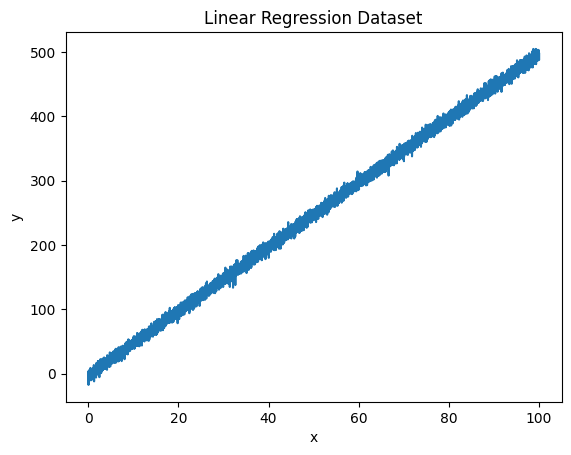

In [3]:
n_points = 10000
a=5
b=-3
alpha = 0.01

x1 = np.linspace(0,100,n_points)
y = a*x1+b

white_noise = np.random.randn(n_points)*max(y)*alpha
y = y + white_noise

features = pd.DataFrame(data={'x1':x1})
target = pd.DataFrame(data={'y':y})
plt.plot(x1,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression Dataset');

## 2. Preprocessing

In [4]:
for col in features.columns:
    features[col] = min_max_scaler(features[col])

In [5]:
# Train - Test Split
train_x, test_x, train_y, test_y = train_test_split(features, target, test_size=0.33, random_state=42)

## 3. Prediction

In [6]:
model = NeuralNetworkFromScratch(layers_dims=[train_x.shape[1], 8, 4, 3, 2, 1], task='regression', learning_rate=1e-5, n_epochs=3000, print_cost=True)

Cost after iteration 0: 1698319059.4110618
Cost after iteration 1000: 248.34159848589678
Cost after iteration 2000: 194.92145468929587
Cost after iteration 2999: 175.94493440370888


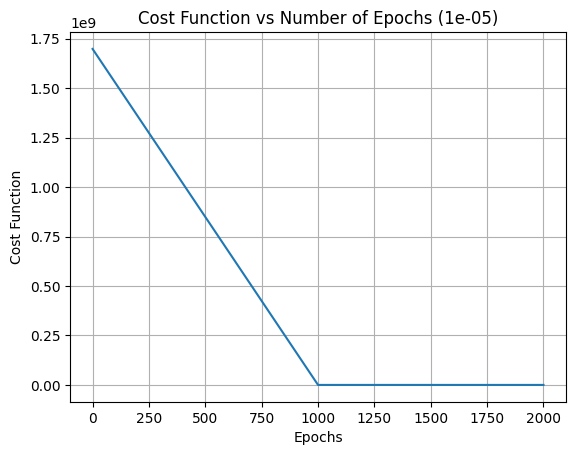

In [7]:
parameters, costs = model.fit(train_x, train_y, print_every=1000, plot_cost_function=True)

In [8]:
pred_train = model.predict(train_x, train_y)

RMSE: 175.93224349740353


In [9]:
pred = model.predict(test_x, test_y)

RMSE: 185.00168070989173


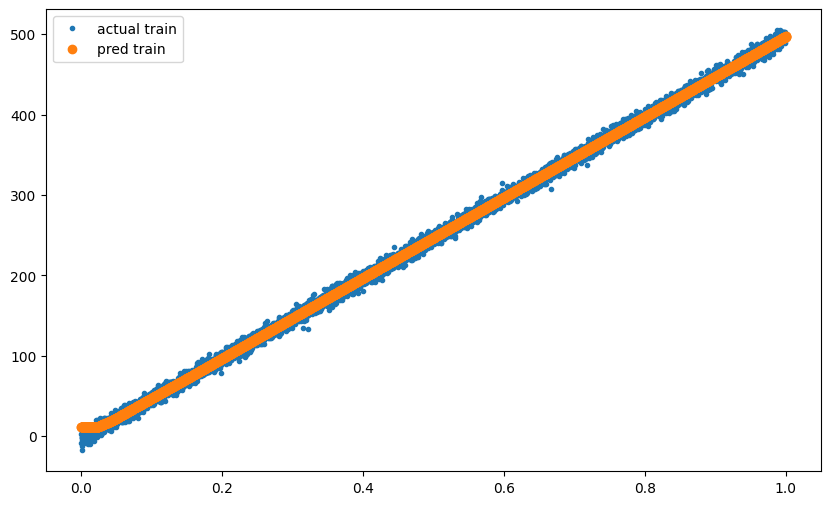

In [10]:
plt.figure(figsize=(10,6))
plt.plot(train_x, train_y, '.', label='actual train')
plt.plot(train_x, pred_train.reshape(-1,1), 'o', label='pred train')
plt.legend();

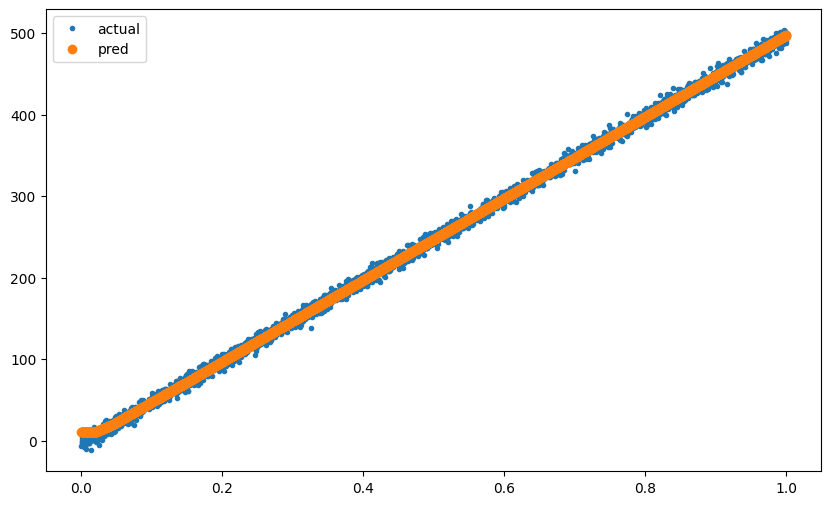

In [11]:
plt.figure(figsize=(10,6))
plt.plot(test_x, test_y, '.', label='actual')
plt.plot(test_x, pred.reshape(-1,1), 'o', label='pred')
plt.legend();

# Example 2: Multiple Linear Regression

## 1. Import Data

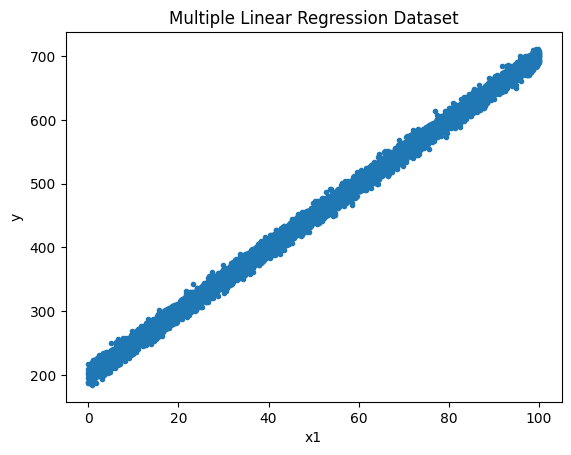

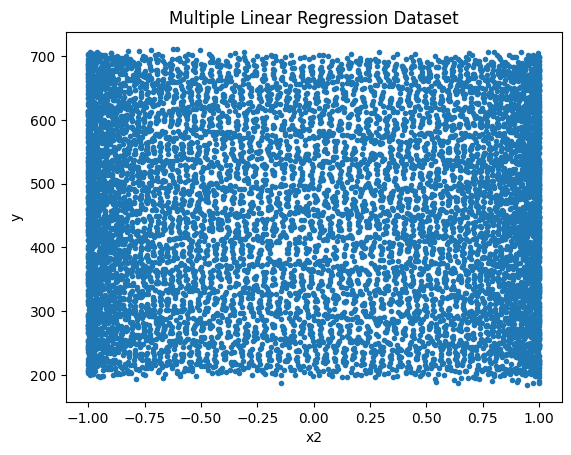

In [70]:
n_points = 10000
a=5
b=-3
c=200
alpha = 0.01

x1 = np.linspace(0,100,n_points)
x2 = np.sin(np.linspace(1250,10526,n_points))

y = a*x1+b*x2+c

white_noise = np.random.randn(n_points)*max(y)*alpha
y = y + white_noise

features = pd.DataFrame(data={'x1':x1, 'x2':x2})
target = pd.DataFrame(data={'y':y})
plt.plot(x1,y, '.')
plt.xlabel('x1')
plt.ylabel('y')
plt.title('Multiple Linear Regression Dataset')

plt.figure()
plt.plot(x2,y, '.')
plt.xlabel('x2')
plt.ylabel('y')
plt.title('Multiple Linear Regression Dataset');

## 2. Preprocessing

In [71]:
# Train - Test Split
split_point = int(n_points * 0.7)

train_x = features[:split_point]
test_x = features[split_point:]
train_y = target[:split_point]
test_y = target[split_point:]

# Train - Test Split
train_x, test_x, train_y, test_y = train_test_split(features, target, test_size=0.33, random_state=42)

In [73]:
for col in train_x.columns:
    train_x[col] = min_max_scaler(train_x[col])

# 3. Prediction

In [100]:
train_x.shape[1]

2

In [137]:
model = NeuralNetworkFromScratch(layers_dims=[train_x.shape[1],2, 1], task='regression', learning_rate=5e-5, n_epochs=100, print_cost=True)

In [138]:
parameters, costs = model.fit(train_x, train_y, print_every=500, plot_cost_function=True)

Cost after iteration 0: 12576810339.390293
Cost after iteration 99: 6906791015.0848055


In [139]:
pred_train = model.predict(train_x, train_y)

RMSE: 6694132276.007569


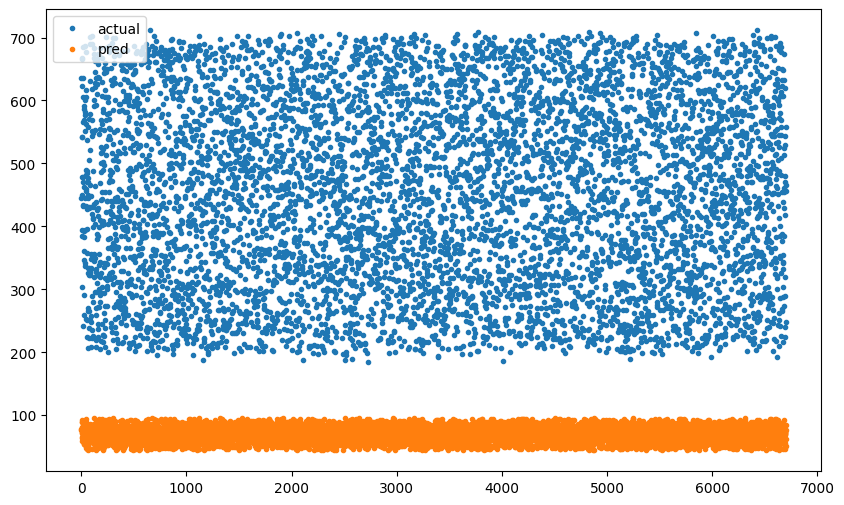

In [140]:
plt.figure(figsize=(10,6))
plt.plot(np.linspace(0,len(train_y),len(train_y)), train_y, '.', label='actual')
plt.plot(np.linspace(0,len(pred_train.T),len(pred_train.T)), pred_train.T, '.', label='pred')
plt.legend();

In [136]:
pred = model.predict(test_x, test_y)

RMSE: 9.404589673860546e+16


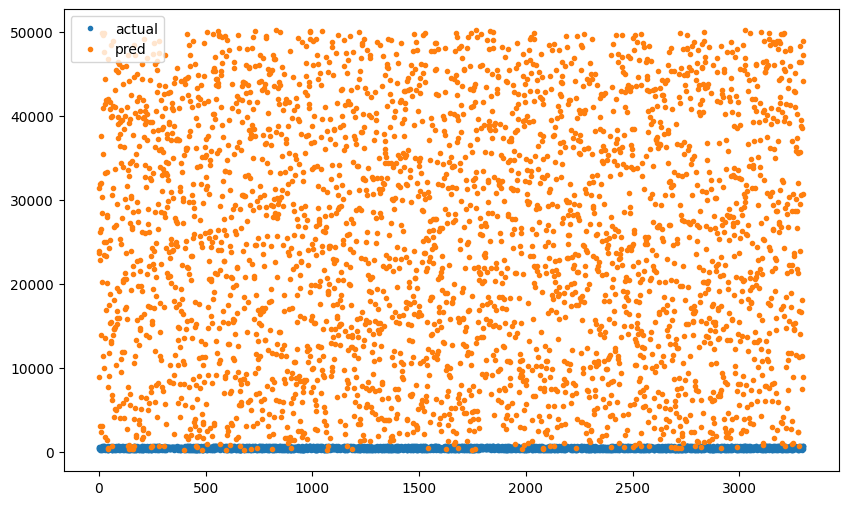

In [105]:
plt.figure(figsize=(10,6))
plt.plot(np.linspace(0,len(test_y),len(test_y)), test_y, '.', label='actual')
plt.plot(np.linspace(0,len(pred.T),len(pred.T)), pred.T, '.', label='pred')
plt.legend();

# Example 3: Fetch California Housing Dataset

## 1. Import Data

In [141]:
data = fetch_california_housing()
features = pd.DataFrame(data=data.data, columns=data.feature_names)
target = pd.DataFrame(data=data.target, columns=data.target_names)

## 2. Preprocessing

In [142]:
for col in features.columns:
    features[col] = min_max_scaler(features[col])

In [143]:
train_x, test_x, train_y, test_y = train_test_split(features, target, test_size=0.33, random_state=42)


## 3. Prediction

In [188]:
model = NeuralNetworkFromScratch(layers_dims=[train_x.shape[1], 4,3,2, 1], task='regression', learning_rate=1e-4, n_epochs=17500, print_cost=True)

Cost after iteration 0: 7.845632470985278
Cost after iteration 1000: 5.755247845299771
Cost after iteration 2000: 4.284617370134006
Cost after iteration 3000: 3.2423032294995355
Cost after iteration 4000: 2.4961070973688977
Cost after iteration 5000: 1.9570834686411644
Cost after iteration 6000: 1.5645607868205194
Cost after iteration 7000: 1.2766601608809685
Cost after iteration 8000: 1.06416677122889
Cost after iteration 9000: 0.9064952362998152
Cost after iteration 10000: 0.7890024084988961
Cost after iteration 11000: 0.7011734739521486
Cost after iteration 12000: 0.6353876746134086
Cost after iteration 13000: 0.5860702956870303
Cost after iteration 14000: 0.5491068496397137
Cost after iteration 15000: 0.5214352705202023
Cost after iteration 16000: 0.5007603395264979
Cost after iteration 17000: 0.48535237093261036
Cost after iteration 17499: 0.47921262538305587


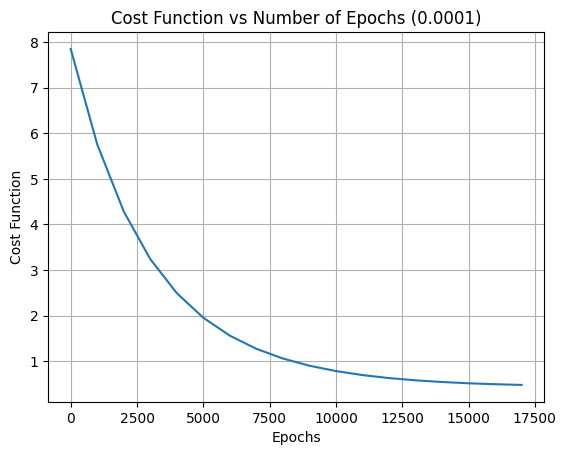

In [189]:
parameters, costs = model.fit(train_x, train_y, print_every=1000, plot_cost_function=True)

In [190]:
pred_train = model.predict(train_x, train_y)
mean_absolute_percentage_error(train_y, pred_train.T)

RMSE: 0.4792012152030495


0.5346422258381256

In [191]:
pred = model.predict(test_x, test_y)
mean_absolute_percentage_error(test_y, pred.T)

RMSE: 0.48223724933764167


0.5429055560305505